In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

: 

In [ ]:
experience = np.array([235, 187,  41, 345, 491, 114,  71, 346, 329, 350, 121,  29, 303,
       274, 209, 235, 361, 204, 201, 136, 281, 192, 341, 294,  62, 233,
       221, 484,  80, 404, 326, 195, 295, 5, 144])
dti = pd.date_range('2022-11-28', periods=35)
data = pd.DataFrame(experience, index=dti, columns=['experience'])
count_test_data = 7

: 

In [39]:
def prepareData(data, lag_start=3, lag_end=7):
    test_size = 7
    data = pd.DataFrame(data.copy())
    
    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.experience.shift(i)

    data['weekday'] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5, 6])*1

    # считаем средние только по тренировочной части, чтобы избежать лика
    data['weekday_average'] = data.weekday.map(codeMean(data[:-test_size], 'weekday', 'experience').get)

    # выкидываем закодированные средними признаки 
    data.drop(['weekday'], axis=1, inplace=True)

    data = data.dropna()
#     data = data.reset_index(drop=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.iloc[:-test_size].drop(['experience'], axis=1)
    y_train = data.iloc[:-test_size]['experience']
    X_test = data.iloc[-test_size:].drop(['experience'], axis=1)
    y_test = data.iloc[-test_size:]['experience']

    return X_train, X_test, y_train, y_test

In [13]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [45]:
X_train, X_test, y_train, y_test = prepareData(data, lag_start=1, lag_end=4)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

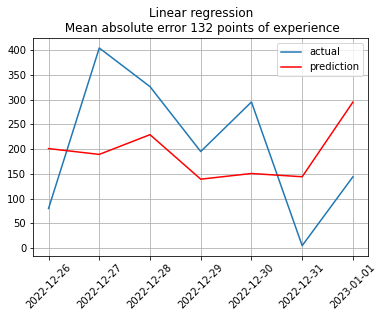

In [55]:
plt.plot(y_test.index, y_test.values, label="actual")
plt.plot(y_test.index, prediction, color='red', label="prediction")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} points of experience".format(round(mean_absolute_error(prediction, y_test))))
plt.xticks(rotation=45)
plt.grid()

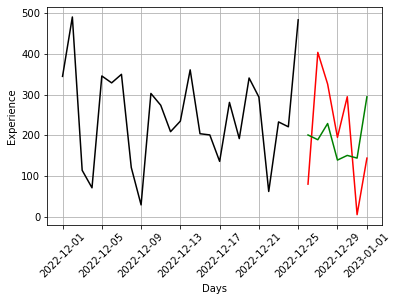

In [58]:
plt.plot(y_train.index, y_train, color = 'black', label='train')
plt.plot(y_test.index, y_test, color = 'red', label='test')
plt.plot(y_test.index, prediction, color = 'green', label='prediction')
plt.xticks(rotation=45)
plt.xlabel("Days")
plt.ylabel("Experience")
plt.grid()
plt.show()